In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation
import pandas as pd
import pickle
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam


In [2]:
Dados = pd.read_csv(r'C:\Users\Mateus\Meu Drive\Compartilhado\eng\9_periodo\Controle inteligente\Trabalho 3\Sem_ganhos\teste4.csv', on_bad_lines='skip', header=None)
# Dados.values
# Dados.head(5)
# print(Dados)

Entradas = Dados.iloc[:,:-1]
Entradas.shape
Saidas = Dados.iloc[:,4]

In [3]:
Entradas

,0,1,2,3
0,-1.012617,-11.945530,0.025040,17.970368
1,-1.132073,0.133452,0.204744,-0.138744
2,-1.130738,1.976486,0.203356,-2.815665
3,-1.110973,1.390203,0.175200,-1.924673
4,-1.097071,0.000745,0.155953,0.153231
...,...,...,...,...
83371,0.000160,-0.000197,0.000027,-0.000033
83372,0.000158,-0.000194,0.000027,-0.000032
83373,0.000156,-0.000192,0.000027,-0.000032
83374,0.000154,-0.000189,0.000026,-0.000032


In [4]:
Xtrain, Xtest, Ytrain, Ytest=train_test_split(Entradas,Saidas,test_size=0.2)

In [50]:
Rede=MLPRegressor(hidden_layer_sizes=[4,4,2,1],
                  activation='relu',
                  verbose=True,
                  max_iter=10000,
                  solver="adam")
Rede.fit(Entradas,Saidas)

Iteration 1, loss = 2680.59246802
Iteration 2, loss = 2634.27198273
Iteration 3, loss = 2406.20402656
Iteration 4, loss = 2108.08782302
Iteration 5, loss = 2025.08691630
Iteration 6, loss = 2006.44035201
Iteration 7, loss = 1994.04322338
Iteration 8, loss = 1983.46968536
Iteration 9, loss = 1974.40194163
Iteration 10, loss = 1967.10525410
Iteration 11, loss = 1961.05907409
Iteration 12, loss = 1956.73546063
Iteration 13, loss = 1952.62975645
Iteration 14, loss = 1949.35032428
Iteration 15, loss = 1945.55098658
Iteration 16, loss = 1942.83024502
Iteration 17, loss = 1939.89561272
Iteration 18, loss = 1938.29202370
Iteration 19, loss = 1935.83505027
Iteration 20, loss = 1933.71573270
Iteration 21, loss = 1931.72264979
Iteration 22, loss = 1929.52578302
Iteration 23, loss = 1928.39807753
Iteration 24, loss = 1925.92368211
Iteration 25, loss = 1924.66718302
Iteration 26, loss = 1923.77068650
Iteration 27, loss = 1921.46775305
Iteration 28, loss = 1919.34320263
Iteration 29, loss = 1917.968

MLPRegressor(hidden_layer_sizes=[4, 4, 2, 1], max_iter=10000, verbose=True)

In [51]:
r2train=Rede.score(Xtrain, Ytrain)
print("R2 Score do treinamento: ", r2train)
r2test=Rede.score(Xtest, Ytest)
print("R2 Score do teste: ", r2test)

R2 Score do treinamento:  0.4932102105042324
R2 Score do teste:  0.5220604958686311


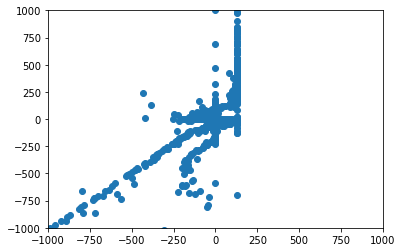

In [52]:
Ypred=Rede.predict(Xtest)
plt.scatter(Ypred,Ytest)
plt.xlim([-1000,1000])
plt.ylim([-1000,1000])
#plt.scatter(Xtest,Ypred)
plt.show()

In [46]:
filename = 'finalized_model_sem_ganhos.sav'
pickle.dump(Rede, open(filename, 'wb'))
 
# some time later...
 


In [50]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(Xtest, Ytest)
print(result)

0.6465708993511641
